# Fake News Detector
This is a very naive and simple approach which achieves accuracy of around 0.77 (Naive Bayes) and 0.79 (Linear SVM).

You can definitely do better! But it should give you at least a first framework with which to begin. Here are some things to try:

## Feature Engineering:
Extract additional features from the text, such as:
- Number of words in the article.
- Number of sentences in the article.
- Average word length.
- Presence of specific keywords or phrases.
- Punctuation counts.
- Capitalization features (e.g., ratio of capitalized words).
    
## Word Embeddings:
Use pre-trained word embeddings like Word2Vec, GloVe, or fastText to capture semantic relationships between words. This can provide a richer representation of your text compared to a simple bag-of-words model.

## Deep Learning:
Implement a deep neural network, perhaps a recurrent neural network (RNN) or long short-term memory (LSTM) network, to capture sequential dependencies in the text.

In [1]:
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Download NLTK stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/mark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the dataset
df = pd.read_csv("../data/fake_news.csv")

In [4]:
df_genuine = df.copy()
df_genuine.drop('fake_news_article', axis=1, inplace=True)  # Drop the 'fake_news_article' column
df_genuine.rename(columns={'content': 'article'}, inplace=True)  # Rename 'content' to 'article'
df_genuine['is_fake'] = 0  # Set 'is_fake' to 0 for genuine news

In [5]:
# Create a dataframe with fake news
df_fake = df.copy()
df_fake.drop('content', axis=1, inplace=True)  # Drop the 'content' column
df_fake.rename(columns={'fake_news_article': 'article'}, inplace=True)  # Rename 'fake_news_article' to 'article'
df_fake['is_fake'] = 1  # Set 'is_fake' to 1 for fake news

In [6]:
# Concatenate the two dataframes
df_combined = pd.concat([df_genuine, df_fake], ignore_index=True)

In [7]:
# Define features (X) and target (y)
X = df_combined['article']
y = df_combined['is_fake']

In [8]:
# Preprocess the text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization and stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in text.split()]

    # Extract 2-and-3-grams
    ngrams = ["_".join(words[i:i+2]) for i in range(len(words)-1)] + ["_".join(words[i:i+3]) for i in range(len(words)-2)]
    
    return " ".join(ngrams)

X = X.apply(preprocess_text)

In [9]:
X[0]

'video_footag footag_continu continu_to to_emerg emerg_of of_the the_mass mass_sexual sexual_assault assault_commit commit_by by_migrant migrant_on on_women women_at at_the the_new new_year’ year’_eve eve_celebr celebr_in in_the the_german german_citi citi_of of_cologne. cologne._[breitbart [breitbart_london london_broke broke_the the_stori stori_of of_the the_attack attack_in in_the the_media media_after after_the the_german german_press press_final final_start start_report report_the the_incid incid_three three_day day_after after_it it_had had_actual actual_happened. happened._the the_media media_silenc silenc_ha ha_stun stun_the the_german german_people, people,_who who_are are_wonder wonder_whi whi_no no_one one_dare dare_report report_such such_as as_massiv massiv_attack attack_by by_so so_mani mani_men men_on on_so so_mani mani_women women_at at_such such_a a_crowd crowd_event. event._the the_latest latest_video video_show show_men men_hurl hurl_firework firework_into into_the t

In [10]:
# Split the data into training and testing sets while maintaining equal class sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Use NLTK stopwords
stop_words = list(stopwords.words('english'))

In [12]:
# Create a TfidfVectorizer to convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # You can adjust max_features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [13]:
# Train a Multinomial Naive Bayes classifier
clf_nb = MultinomialNB()
clf_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [14]:
# Train a Linear SVM classifier
clf_svm = SVC(kernel='linear', C=1.0, random_state=42)
clf_svm.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [15]:
# Make predictions on the test set
y_pred_nb = clf_nb.predict(X_test_tfidf)
y_pred_svm = clf_svm.predict(X_test_tfidf)

In [16]:
# Evaluate the models
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

In [17]:
# Print the results
print(f"Accuracy (naive Bayes): {accuracy_nb}")
print("\nConfusion Matrix:")
print(conf_matrix_nb)
print("\nClassification Report:")
print(classification_rep_nb)

print(f"Accuracy (SVM): {accuracy_svm}")
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(classification_rep_svm)

Accuracy (naive Bayes): 0.7690355329949239

Confusion Matrix:
[[169  28]
 [ 63 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       197
           1       0.83      0.68      0.75       197

    accuracy                           0.77       394
   macro avg       0.78      0.77      0.77       394
weighted avg       0.78      0.77      0.77       394

Accuracy (SVM): 0.7918781725888325

Confusion Matrix:
[[175  22]
 [ 60 137]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       197
           1       0.86      0.70      0.77       197

    accuracy                           0.79       394
   macro avg       0.80      0.79      0.79       394
weighted avg       0.80      0.79      0.79       394



Top 20 features:
             log_prob_genuine  log_prob_fake  log_prob_difference
th                  -9.182502      -6.580406             2.602097
biden               -9.239449      -7.202791             2.036659
anti                -9.403829      -7.488828             1.915001
_000                -6.784808      -8.685848             1.901040
_s                  -6.422052      -8.267579             1.845527
_biden              -9.055086      -7.374030             1.681056
000                 -8.368330      -6.887332             1.480998
joe_biden           -9.140206      -7.664500             1.475706
despit              -8.973670      -7.522205             1.451465
smith               -9.106284      -7.664746             1.441539
_com                -7.271374      -8.705183             1.433808
pro                 -9.403829      -7.986687             1.417141
a_shock             -9.340253      -7.938215             1.402038
_5                  -7.854637      -9.197705             1.

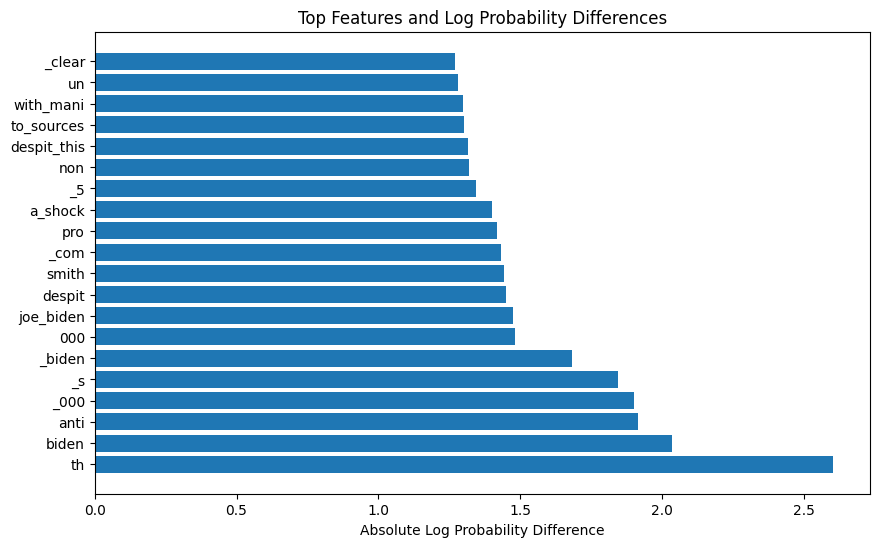

In [18]:
# Extract feature names from the TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the log probabilities from the trained Naive Bayes classifier
log_probabilities = clf_nb.feature_log_prob_

# Create a dataframe to store feature names and their log probabilities
feature_importance_df = pd.DataFrame(log_probabilities, columns=feature_names).transpose()

# Rename the columns for better interpretation
feature_importance_df.columns = ['log_prob_genuine', 'log_prob_fake']

# Calculate the absolute difference between log probabilities
feature_importance_df['log_prob_difference'] = abs(feature_importance_df['log_prob_genuine'] - feature_importance_df['log_prob_fake'])

# Sort the dataframe by the absolute log probability difference
sorted_features = feature_importance_df.sort_values(by='log_prob_difference', ascending=False)

# Display the top N features
top_n_features = 20
print(f"Top {top_n_features} features:")
print(sorted_features.head(top_n_features))

# Plot the top features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(sorted_features.index[:top_n_features], sorted_features['log_prob_difference'][:top_n_features])
plt.xlabel('Absolute Log Probability Difference')
plt.title('Top Features and Log Probability Differences')
plt.show()

Top 20 features:
        Feature  Coefficient
67         _000    -3.359486
3872         th     3.357177
1           000     2.969397
682          _s    -2.963162
1458      biden     2.940243
248        _com    -2.658452
1655        com     2.337311
1244       anti     2.206021
188      _biden     2.192161
280     _despit     2.014343
592         _or    -1.834626
4292  the_truth     1.674652
503          _m    -1.637351
916          a_    -1.618168
2668  joe_biden     1.588401
3934       the_    -1.561388
759       _that    -1.531569
1340     at_the    -1.515442
3692      smith     1.466393
4434        to_    -1.447407


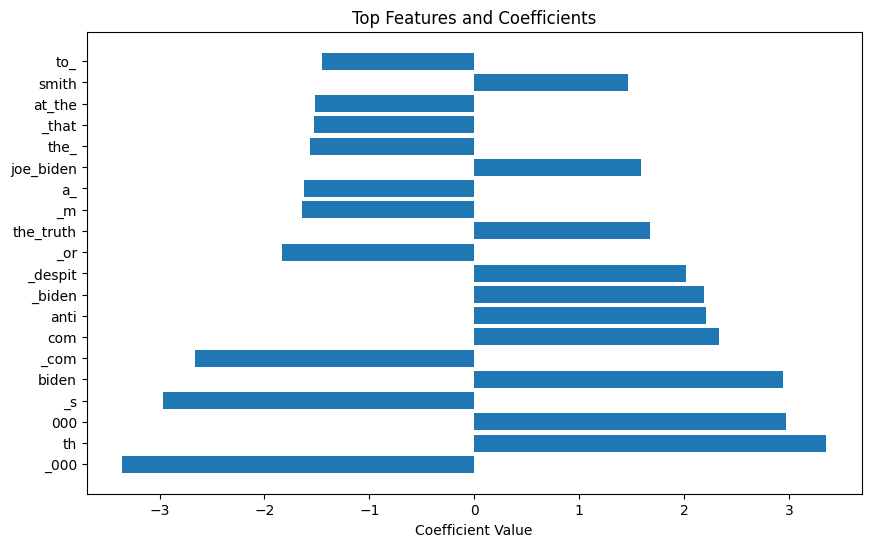

In [19]:
# Extract feature names from the TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients and intercept from the trained Linear SVM classifier
coefficients = clf_svm.coef_.toarray()[0]  # Convert to a dense array
intercept = clf_svm.intercept_

# Create a dataframe to store feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the top N features based on absolute coefficient values
top_n_features = 20
sorted_features = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)
print(f"Top {top_n_features} features:")
print(sorted_features.head(top_n_features))

# Plot the top features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(sorted_features['Feature'][:top_n_features], sorted_features['Coefficient'][:top_n_features])
plt.xlabel('Coefficient Value')
plt.title('Top Features and Coefficients')
plt.show()